In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Data processing, modeling, and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix

#Files
import h5py
import glob
import seaborn as sns

In [2]:
f=h5py.File(r'features_database_gait_one_cycles_both_legs_jrd.h5', 'r')
print(list(f.keys()))
x = f['right'][:,:,:]
print('(samples, timesteps, features)', x.shape)

['left', 'right']
(samples, timesteps, features) (74, 132, 1)


In [3]:
path = f'cut_one_gait_cycle_right'
filelist =[]
digits =[]
digits_int =[]
for file in glob.glob(f'{path}\\*.c3d',recursive = True):
    filelist.append(file[4:-4].replace("_", ""))
    digits.append(file[25:-9])

for ele in digits:
    digits_int.append(1) if ele=='degeneration' else digits_int.append(0)

In [4]:
# digits

In [5]:
nsamples, nx, ny = x.shape
d2_x = x.reshape((nsamples,nx*ny))

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(d2_x)
scaled_data.shape

(74, 132)

In [7]:
pca = PCA(n_components=scaled_data.shape[0], svd_solver='full')
pca.fit(scaled_data)
X_pca = pca.transform(scaled_data)

In [8]:
# # Calculate cumulative explained variance across all PCs

# cum_exp_var = []
# var_exp = 0
# for i in pca.explained_variance_ratio_:
#     var_exp += i
#     cum_exp_var.append(var_exp)
    
# # Visualize class distribution

# pd.DataFrame(digits_int).value_counts().plot(kind='bar')
# plt.xticks([0,1], ['Degeneration', 'Healthy'])
# plt.ylabel('Count');
    
# # Plot cumulative explained variance for all PCs

# fig, ax = plt.subplots(figsize=(8,6))
# ax.bar(range(1,29), cum_exp_var)
# ax.set_xlabel('Principal Components')
# ax.set_ylabel('Cumulative Variance Explained %');

In [9]:
# train_f1 = []
# test_f1 = []

# for i in range(74):
    
#     X = X_pca[:,0:i+1]
    
#     # Train-test-split
#     X_train, X_test, y_train, y_test = train_test_split(X, digits_int,
#                                                         test_size=0.25,
#                                                         random_state=42)

#     # Perform feature scaling
#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)

#     # Fit k-NN classifier and make predictions
#     knn = KNeighborsClassifier()
#     knn.fit(X_train, y_train)
#     y_pred_train = knn.predict(X_train)
#     y_pred_test = knn.predict(X_test)
#     train_f1.append(f1_score(y_train, y_pred_train))
#     test_f1.append(f1_score(y_test, y_pred_test))

# # Plot accuracy by n_neighbors
# plt.figure(figsize=(8, 6))
# plt.plot(range(1,75), train_f1, label='Train f1 Score')
# plt.plot(range(1,75), test_f1, label='Test f1 Score')
# plt.ylabel('f1 Score')
# plt.xlabel('# of Principal Components')
# plt.legend()
# plt.show()

In [10]:
X = X_pca[:,0:scaled_data.shape[0]]
    
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, digits_int,
                                                    test_size=0.25,
                                                    random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit k-NN classifier and make predictions
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
    
print(f'Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))

Train f1 Score: 0.4736842105263158
Test f1 Score: 0.4
              precision    recall  f1-score   support

           0       0.44      1.00      0.61         7
           1       1.00      0.25      0.40        12

    accuracy                           0.53        19
   macro avg       0.72      0.62      0.50        19
weighted avg       0.79      0.53      0.48        19



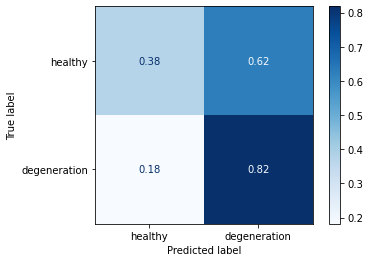

In [12]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=['healthy','degeneration'],
                      normalize='true', cmap='Blues');

Text(0, 0.5, 'Twenty-sixth Principal Component')

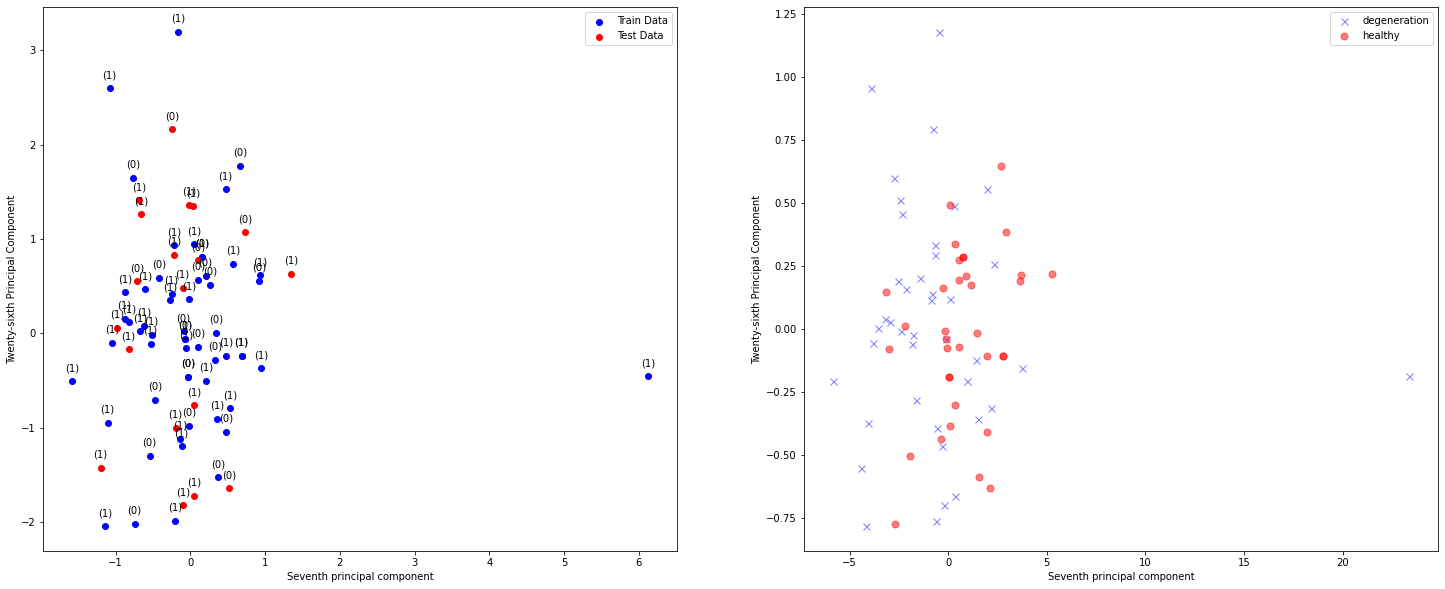

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(25,10))

#KNN and PCA

ax[0].scatter(X_train[:,7],X_train[:,26], c='blue', label='Train Data')
for x,y,z in zip(X_train[:,7],X_train[:,26], y_pred_train):
    label = f"({z})"
    ax[0].annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')

ax[0].scatter(X_test[:,7],X_test[:,26], c='red', label='Test Data')
for x,y,z in zip(X_test[:,7],X_test[:,26], y_pred_test):
    label = f"({z})"
    ax[0].annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')
    
ax[0].set_xlabel('Seventh principal component')
ax[0].set_ylabel('Twenty-sixth Principal Component')
ax[0].legend()

#Only PCA
ax[1].plot(X_pca[0:41,7],X_pca[0:41,26], 'x', markersize=7, color='blue', alpha=0.5, label='degeneration')
ax[1].plot(X_pca[41:76,7],X_pca[41:76,26], 'o', markersize=7, color='red', alpha=0.5, label='healthy')
ax[1].legend()
ax[1].set_xlabel('Seventh principal component')
ax[1].set_ylabel('Twenty-sixth Principal Component')

In [26]:
X_train

array([[-0.37327023,  0.15981435, -1.77343428, ..., -0.59512718,
        -1.58998265, -0.17786604],
       [ 0.40918193, -0.63166808, -0.83991959, ...,  0.65679349,
        -1.00291235, -0.17821549],
       [-0.46023916,  0.10049658, -0.12045761, ..., -0.93412822,
         0.28133372, -0.2734287 ],
       ...,
       [ 1.03235127, -0.7026726 , -1.27236489, ...,  0.11007973,
        -1.32478439,  1.75067931],
       [-1.01973683,  0.06337904,  0.3785762 , ..., -0.91340916,
         0.71322059, -0.48171462],
       [ 0.19677398, -1.13701919,  0.5124922 , ...,  0.34376337,
         0.66038321, -0.55861664]])